In [1]:
import pandas as pd

In [2]:
from pathlib import Path

path = Path('/root/project/data/Market-1501-v15.09.15')
folder = 'bounding_box_train'
df = pd.read_pickle('fastai_traindata.pkl')

In [ ]:
pd.read_pickle

In [3]:
from fastai.vision.data import ImageDataBunch

data = ImageDataBunch.from_df(path, df, folder)

In [4]:
len(data)

TypeError: object of type 'ImageDataBunch' has no len()

In [4]:
from fastai.vision.learner import create_cnn
from torchvision.models import resnet50

learner = create_cnn(data, resnet50)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


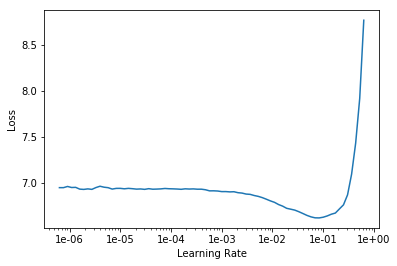

In [5]:
learner.lr_find()
learner.recorder.plot()

In [6]:
lr = 2e-2
learner.fit_one_cycle(5, slice(lr))

In [7]:
learner.save('five_epoch')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


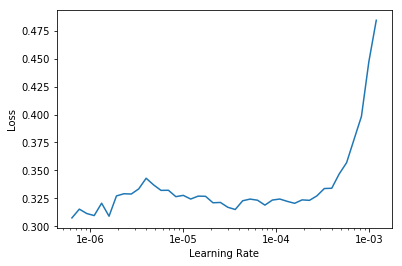

In [8]:
learner.load('five_epoch')
learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

In [9]:
learner.fit_one_cycle(10, slice(1e-6, lr/5))
learner.save('fifteen_epoch')